In [1]:
## 기본 패키지 import 
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style = 'whitegrid')
import warnings 
warnings.filterwarnings('ignore')

##한글 사용을 위한 추가 설정 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15,4)
mpl.rcParams['axes.unicode_minus'] = False

#### Part I. 데이터 불러오기 
- '장비시간' 컬럼을 엑셀에에서 셀서식 기능을 사용하여 HH:MM:SS 형식으로 변경
- 샘플파일 3개 모두 csv 파일로 다시 저장 

In [4]:
df_1 = pd.read_csv('data/4) 9월 개질기 운전 밴더_sample.csv', encoding = 'cp949')
df_2 = pd.read_csv('data/sample_10002_AH_column .CSV', encoding = 'cp949')
df_3 = pd.read_csv('data/sample_10959_S&T_column.CSV', encoding = 'cp949')

print(df_1.shape)
print(df_2.shape)
print(df_3.shape)

(41659, 160)
(11548, 160)
(4869, 160)


In [5]:
## 읽어온 3개의 데이터셋을 하나로 합치기 
## 3개 파일의 스키마가 모두 일치하므로, concat으로 간단히 합친다. 
df = pd.concat([df_1, df_2, df_3])
print(df.shape)
df.head()

(58076, 160)


,바인딩시간,장비번호,장비날짜,장비시간,Pattern,Load,ACP,TT Cogen,Seq,TT117,...,W_Desulfur,W_CO,W_Backflow,W_P301_F_Cnt,S_Level_Con,S_Desulfur,S_CO,S_Backflow,S_P301_F_Cnt,S_P203OL
0,2.019090e+13,10965,2019-09-01,0:58:19,0,2,723,59.3,4990,109.9,...,False,False,False,False,False,False,False,False,False,False
1,2.019090e+13,10965,2019-09-01,0:59:20,0,2,724,59.3,4990,109.9,...,False,False,False,False,False,False,False,False,False,False
2,2.019090e+13,10965,2019-09-01,1:00:21,0,2,724,59.3,4990,110.0,...,False,False,False,False,False,False,False,False,False,False
3,2.019090e+13,10965,2019-09-01,1:01:23,0,2,723,59.3,4990,110.1,...,False,False,False,False,False,False,False,False,False,False
4,2.019090e+13,10965,2019-09-01,1:02:19,0,2,724,59.3,4990,109.8,...,False,False,False,False,False,False,False,False,False,False


#### Part II. 데이터 전처리 
- 날짜와 시간을 분석하기 편한 형태로 변경해 주기 위함 
- 먼저 '장비날짜'와 '장비시간' 컬럼을 결합하여, 'yy:mm:dd HH:MM:SS' 형태로 만들면, 보다 쉽게 다룰 수 있다. 

In [6]:
## 장비날짜와 장비시간을 합쳐서 새로운 컬럼 equit_dt를 만들자 
df['equip_dt'] = df['장비날짜'] + ' ' + df['장비시간']
df['equip_dt'] = pd.to_datetime(df['equip_dt'])
df.head() 

,바인딩시간,장비번호,장비날짜,장비시간,Pattern,Load,ACP,TT Cogen,Seq,TT117,...,W_CO,W_Backflow,W_P301_F_Cnt,S_Level_Con,S_Desulfur,S_CO,S_Backflow,S_P301_F_Cnt,S_P203OL,equip_dt
0,2.019090e+13,10965,2019-09-01,0:58:19,0,2,723,59.3,4990,109.9,...,False,False,False,False,False,False,False,False,False,2019-09-01 00:58:19
1,2.019090e+13,10965,2019-09-01,0:59:20,0,2,724,59.3,4990,109.9,...,False,False,False,False,False,False,False,False,False,2019-09-01 00:59:20
2,2.019090e+13,10965,2019-09-01,1:00:21,0,2,724,59.3,4990,110.0,...,False,False,False,False,False,False,False,False,False,2019-09-01 01:00:21
3,2.019090e+13,10965,2019-09-01,1:01:23,0,2,723,59.3,4990,110.1,...,False,False,False,False,False,False,False,False,False,2019-09-01 01:01:23
4,2.019090e+13,10965,2019-09-01,1:02:19,0,2,724,59.3,4990,109.8,...,False,False,False,False,False,False,False,False,False,2019-09-01 01:02:19


In [7]:
df['year'] = df['equip_dt'].dt.year
df['month'] = df['equip_dt'].dt.month
df['day'] = df['equip_dt'].dt.day
df['hour'] = df['equip_dt'].dt.hour
df['minute'] = df['equip_dt'].dt.minute
df['second'] = df['equip_dt'].dt.second

df.head()

,바인딩시간,장비번호,장비날짜,장비시간,Pattern,Load,ACP,TT Cogen,Seq,TT117,...,S_Backflow,S_P301_F_Cnt,S_P203OL,equip_dt,year,month,day,hour,minute,second
0,2.019090e+13,10965,2019-09-01,0:58:19,0,2,723,59.3,4990,109.9,...,False,False,False,2019-09-01 00:58:19,2019,9,1,0,58,19
1,2.019090e+13,10965,2019-09-01,0:59:20,0,2,724,59.3,4990,109.9,...,False,False,False,2019-09-01 00:59:20,2019,9,1,0,59,20
2,2.019090e+13,10965,2019-09-01,1:00:21,0,2,724,59.3,4990,110.0,...,False,False,False,2019-09-01 01:00:21,2019,9,1,1,0,21
3,2.019090e+13,10965,2019-09-01,1:01:23,0,2,723,59.3,4990,110.1,...,False,False,False,2019-09-01 01:01:23,2019,9,1,1,1,23
4,2.019090e+13,10965,2019-09-01,1:02:19,0,2,724,59.3,4990,109.8,...,False,False,False,2019-09-01 01:02:19,2019,9,1,1,2,19


#### Part III. 변수들의 통계량 쉽게 구하기 
- ACP, TT100 등 분석대상 변수를 list로 만들어 놓으면 편하다. 
- 변수명을 직접 입력할 수도 있지만, 별도의 변수리스트 파일을 엑셀로 만들어 놓은 경우를 가정한다. 

In [8]:
## 분석대상 변수들을 불러오기 
var_list = pd.read_csv('data/var_list.csv')
var_list.head()

,var_name
0,ACP
1,TT Cogen
2,TT117
3,TT102
4,TT105


In [9]:
## 분석대상 변수들을 리스트 형태로 저장 
var_list_2 = var_list['var_name']
var_list_2.head(10)

0         ACP
1    TT Cogen
2       TT117
3       TT102
4       TT105
5       TT109
6       TT112
7       TT123
8       TT120
9       TT101
Name: var_name, dtype: object

In [10]:
## 분석대상 변수들의 통계량 일괄 구히기
df[var_list_2].describe()

,ACP,TT Cogen,TT117,TT102,TT105,TT109,TT112,TT123,TT120,TT101,...,Cogen,P301_MF,Stack_V,INV_V,INV_I,AC_V,Stack_I,AC_V_A,AC_V_B,AC_V_C
count,58076.000000,58076.000000,58076.000000,58076.000000,58076.0,58076.000000,58076.000000,58076.000000,58076.000000,58076.000000,...,58076.0,58076.0,58076.000000,58076.000000,58076.000000,58076.000000,58076.000000,58076.000000,58076.000000,58076.000000
mean,530.691335,58.285564,161.728635,554.787108,1372.0,192.201798,141.081213,83.214564,636.781335,117.604344,...,0.0,0.0,12.949688,12.532037,33.962614,229.838959,3.039512,59.908353,323.191385,229.838959
std,329.573024,4.714774,77.781637,169.717333,0.0,28.742089,25.544778,9.438758,211.848551,13.576545,...,0.0,0.0,7.185511,7.190047,21.181661,2.623822,6.652324,0.093975,3.733635,2.623822
min,0.000000,31.700000,100.300000,142.800000,1372.0,117.400000,78.400000,51.500000,138.900000,97.000000,...,0.0,0.0,0.000000,0.230000,0.000000,220.700000,0.540000,59.200000,310.300000,220.700000
25%,0.000000,56.700000,110.000000,592.675000,1372.0,180.000000,139.900000,84.100000,697.275000,112.100000,...,0.0,0.0,7.560000,2.210000,0.000000,228.500000,0.540000,59.800000,321.400000,228.500000
50%,735.000000,59.700000,111.000000,646.000000,1372.0,180.800000,140.000000,86.900000,749.700000,112.600000,...,0.0,0.0,16.920000,16.750000,47.180000,230.300000,0.540000,59.900000,323.900000,230.300000
75%,741.000000,61.100000,237.725000,647.200000,1372.0,195.900000,140.200000,88.400000,752.700000,115.700000,...,0.0,0.0,17.050000,16.880000,47.200000,231.700000,2.380000,60.000000,325.900000,231.700000
max,943.000000,66.000000,355.700000,686.200000,1372.0,280.600000,230.300000,125.400000,3180.000000,198.500000,...,0.0,0.0,28.500000,23.160000,64.580000,236.500000,48.930000,60.400000,332.400000,236.500000


In [11]:
## 일괄 통계량 구한 값을 csv파일로 내보내기 
a = df[var_list_2].describe() 
a.to_csv('output/stat_result_all.csv')

In [12]:
## 특정 변수(컬럼)의 일자별 통계량 구하기  - ex. ACP
df_ACP = df[['ACP', 'day']] 
df_ACP.groupby('day').describe()

ACP                                                           
       count        mean         std    min    25%    50%    75%    max
day                                                                    
1     1348.0  724.938427    1.020171  721.0  724.0  725.0  726.0  728.0
2    12929.0  153.964962  305.298644    0.0    0.0    0.0    0.0  943.0
3     1353.0  596.170732  278.764226    0.0  722.0  724.0  732.0  811.0
4     1328.0  654.792169  227.190963    0.0  731.0  733.0  736.0  822.0
5     1399.0  730.403145    1.304396  723.0  730.0  730.0  731.0  734.0
6     1411.0  651.204819  231.857326    0.0  732.0  734.0  735.0  823.0
7     1395.0  730.559140    1.271549  726.0  730.0  731.0  731.0  733.0
8     1393.0  650.025126  234.831001    0.0  732.0  735.0  738.0  825.0
9     1424.0  731.398174    2.031937  724.0  730.0  732.0  733.0  736.0
10    1340.0  649.318657  238.836658    0.0  735.0  738.0  739.0  833.0
11    1394.0  733.692253    1.270058  729.0  733.0  734.0  735.0  738.0
12    1402.0  655.500000  232.498349    0.0  737.0  738.0  741.0  833.0
13    1408.0  736.252841    1.221109  731.0  736.0  736.0  737.0  740.0
14    6277.0  293.367373  335.960649    0.0    0.0  263.0  738.0  856.0
15    1410.0  736.664539    1.327315  730.0  736.0  737.0  738.0  739.0
16    1389.0  656.331893  233.818453    0.0  737.0  740.0  742.0  837.0
17    1415.0  737.637456    0.916228  733.0  737.0  738.0  738.0  740.0
18    1398.0  656.296853  236.624127    0.0  741.0  742.0  744.0  832.0
19    1404.0  739.142450    1.117320  733.0  738.0  739.0  740.0  742.0
20    1387.0  656.078587  238.276475    0.0  741.0  742.0  745.0  825.0
21    1395.0  739.501075    0.887805  735.0  739.0  740.0  740.0  742.0
22    1362.0  657.493392  236.866748    0.0  741.0  742.0  746.0  834.0
23    1422.0  740.731364    1.219528  736.0  740.0  741.0  741.0  744.0
24    1390.0  662.180576  232.568155    0.0  743.0  744.0  746.0  830.0
25    1399.0  741.625447    1.304152  736.0  741.0  741.0  742.0  747.0
26    1390.0  659.357554  236.767415    0.0  743.0  744.0  747.0  836.0
27    1395.0  741.594265    1.186471  738.0  741.0  742.0  742.0  745.0
28    1404.0  660.213675  234.236422    0.0  742.0  743.0  746.0  833.0
29    1406.0  741.573969    0.969208  736.0  741.0  742.0  742.0  744.0
30    1309.0  657.962567  237.128907    0.0  742.0  743.0  746.0  836.0

In [13]:
## 특정컬럼 일자별 통계량 내보내기 
b = df_ACP.groupby('day').describe()
b.to_csv('output/stat-result_acp.csv')

#### Part IV. 분석대상 변수들에 대한 chart 그리기 
- for 반복문을 사용하여 다수의 차트만들기 작업을 자동화 할 수 있다. 

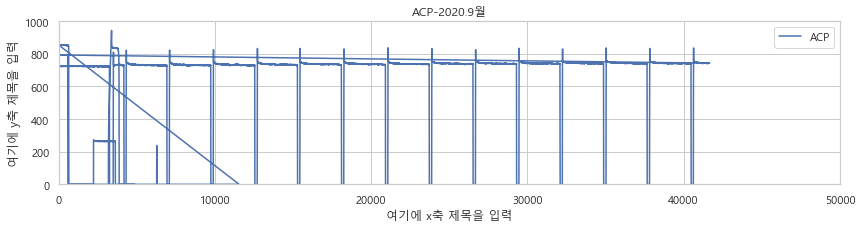

In [20]:
## 간단하게 특정 변수에 대한 차트를 그리려면 아래와 같이 ... 
## 주석처리된 것은 모두 옵션임 (생략할 경우 파이썬이 default 값에 따라 실행)

plt.figure(figsize = (14,3))   ### 차트크기를 지정하고 싶으면, figsize가 면저 지정되어야 함 

df['ACP'].plot()

plt.xlabel('여기에 x축 제목을 입력')   ## 필요하면 x축 제목 지정 
plt.ylabel('여기에 y축 제목을 입력')   ## 필요하면 y축 제목 지정 
plt.xlim([0,50000])  ## 필요하면 x, y축 범위를 강제 지정할 수 있다. 
plt.ylim([0,1000])
plt.title('ACP-2020.9월')
plt.legend()  ## 필요하면 범례를 추가할 수 있다. 

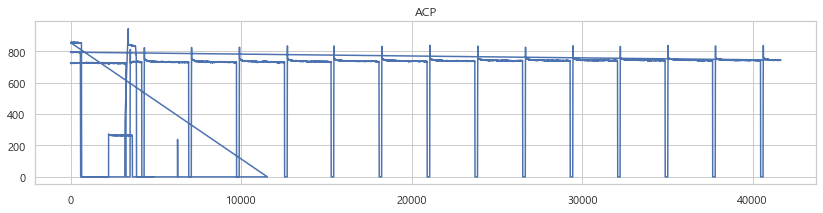

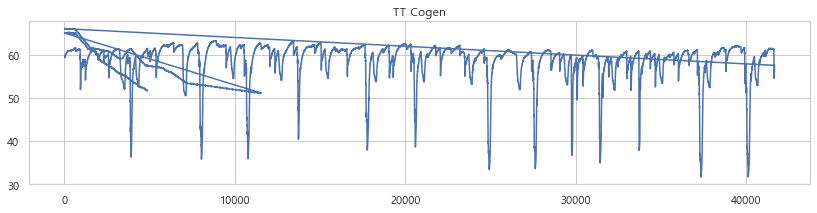

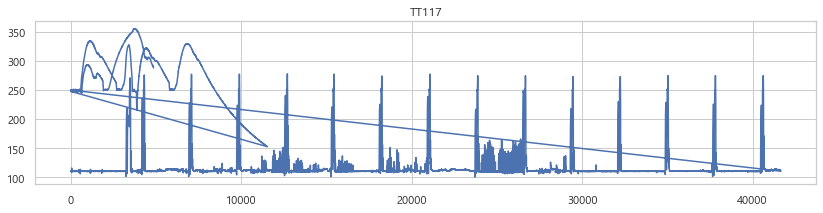

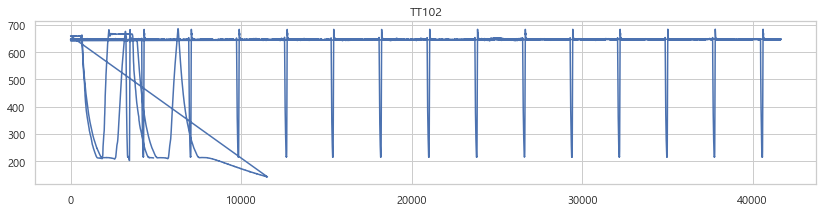

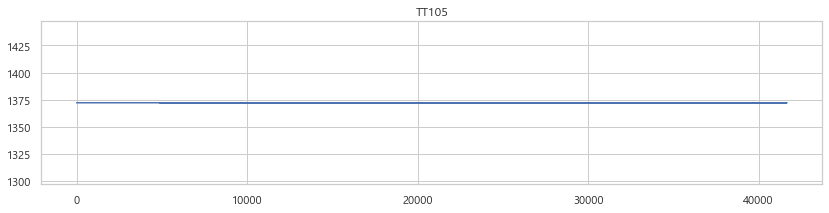

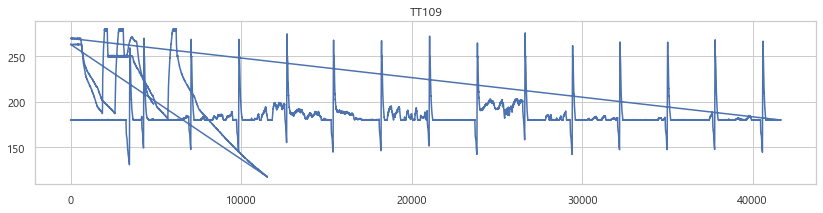

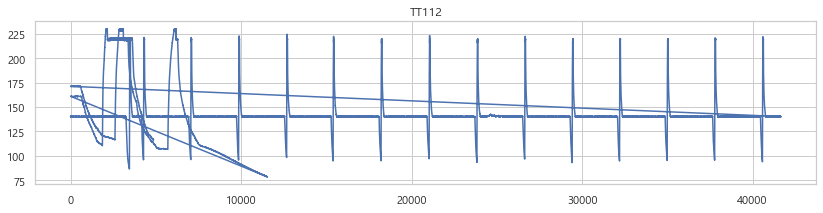

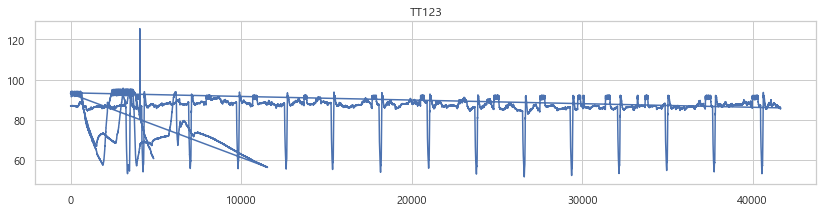

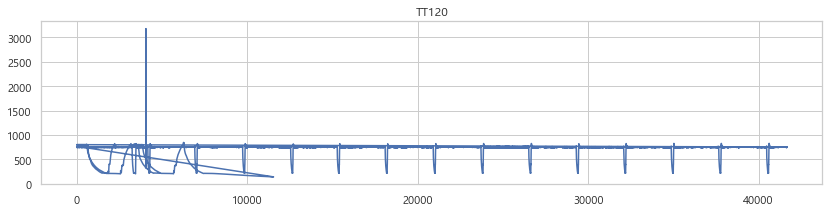

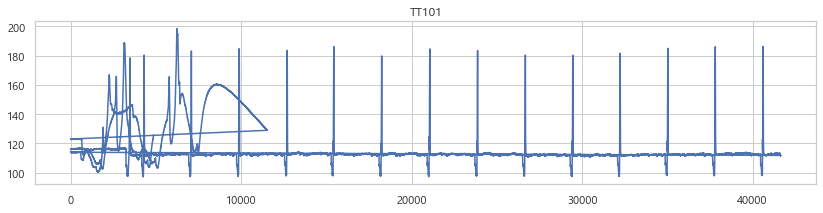

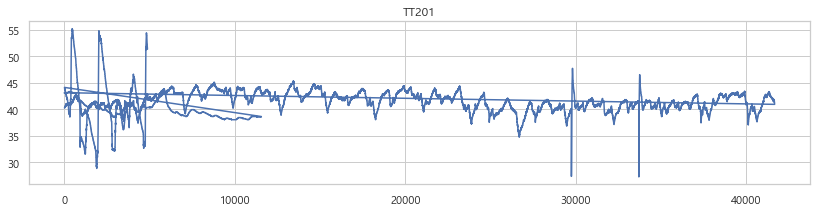

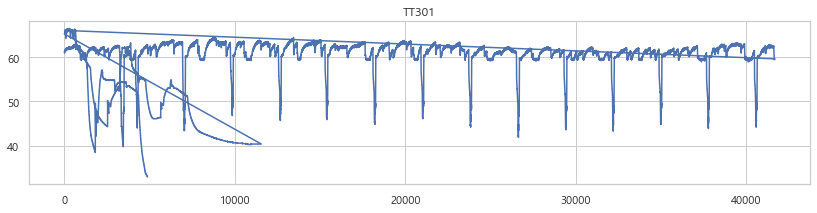

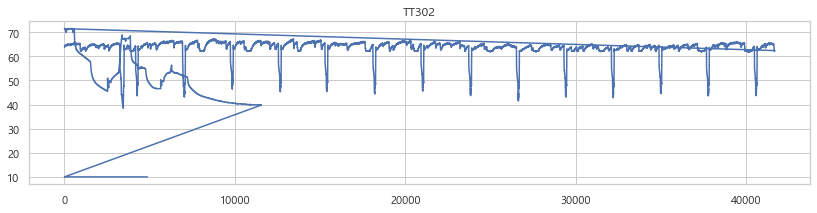

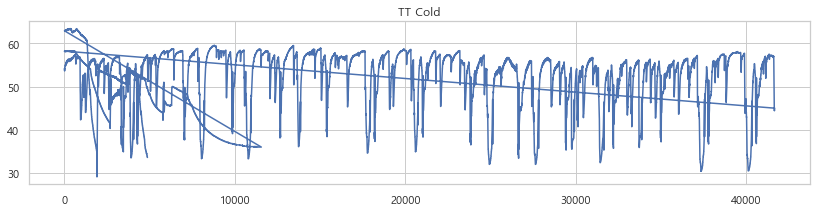

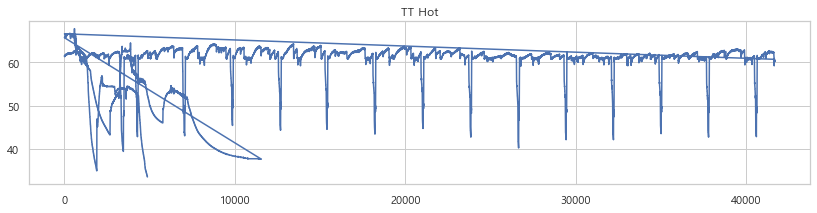

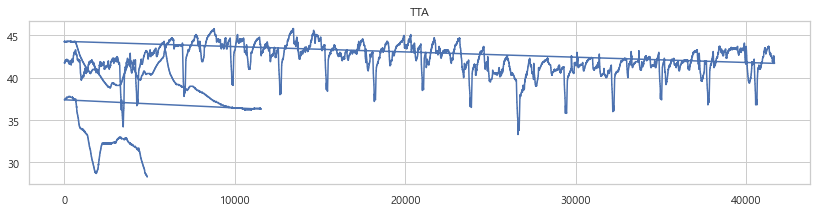

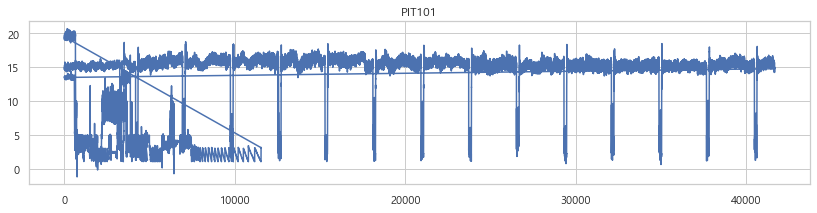

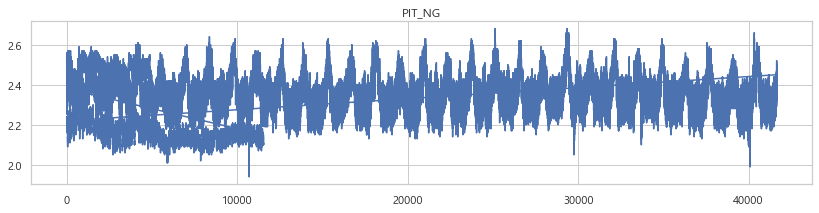

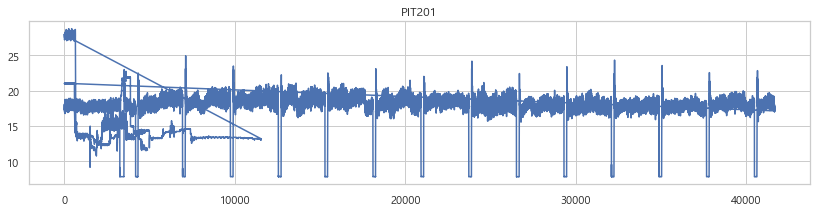

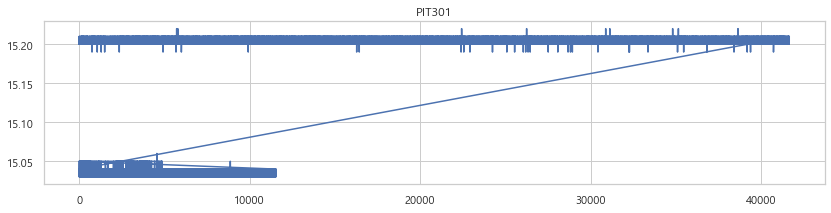

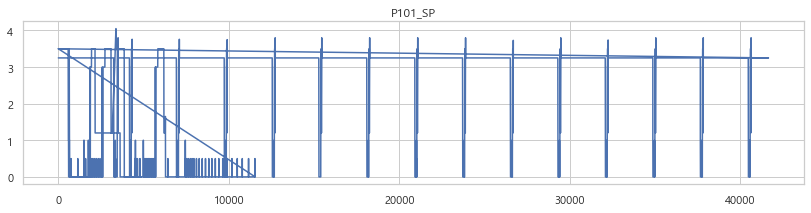

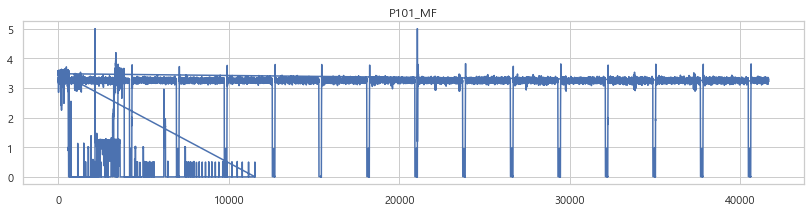

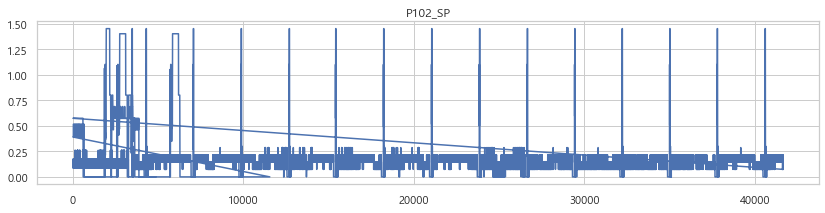

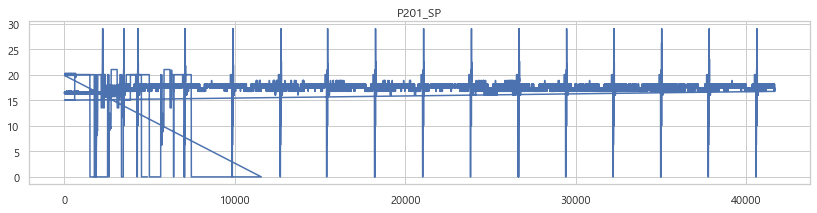

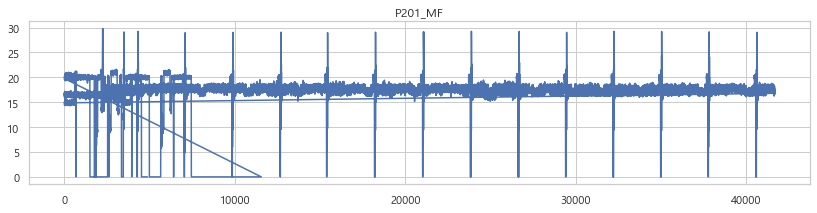

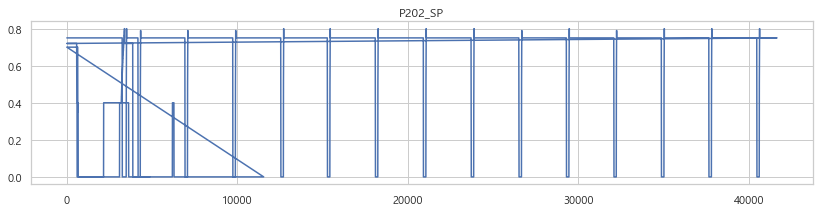

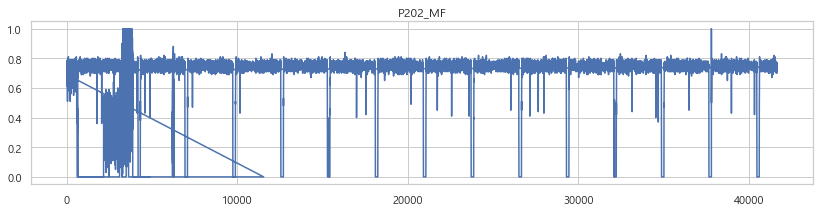

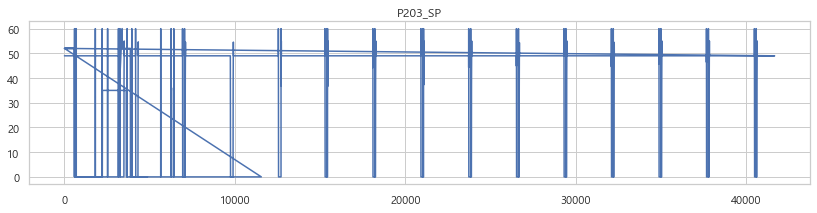

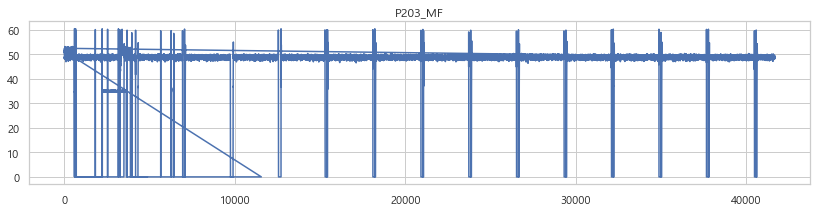

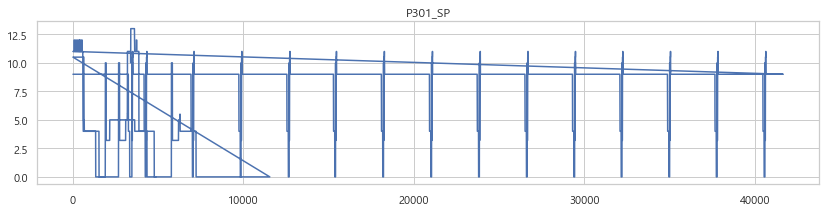

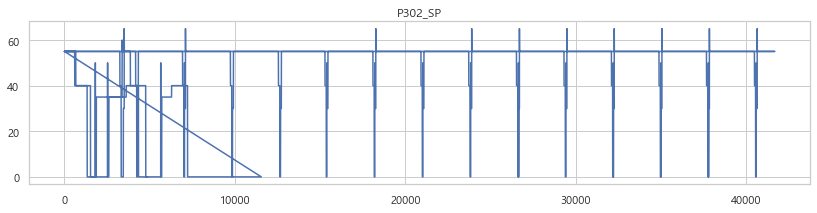

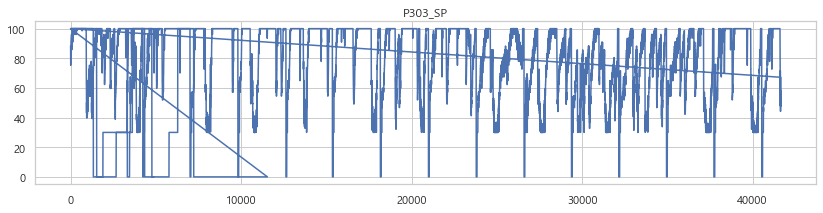

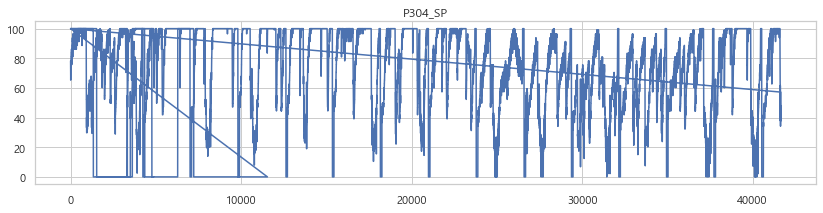

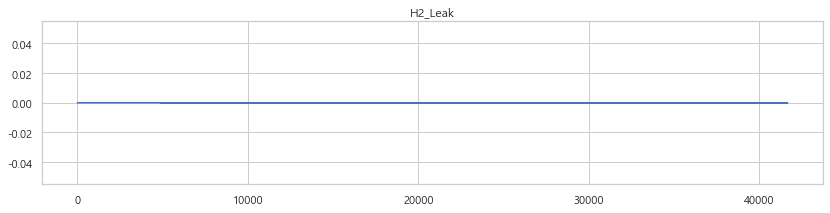

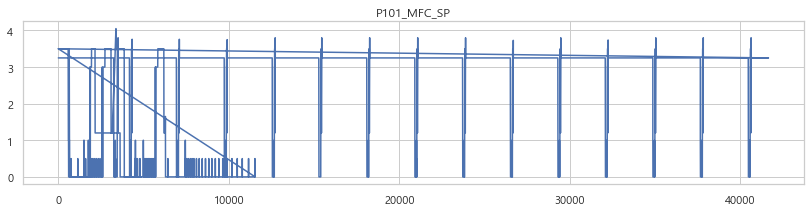

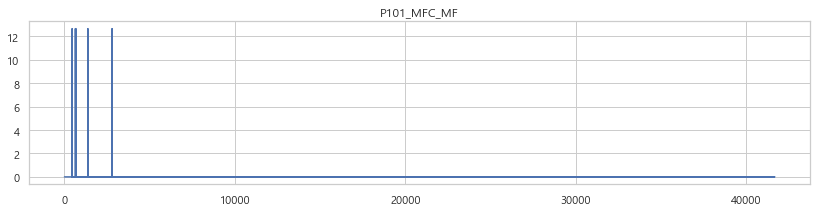

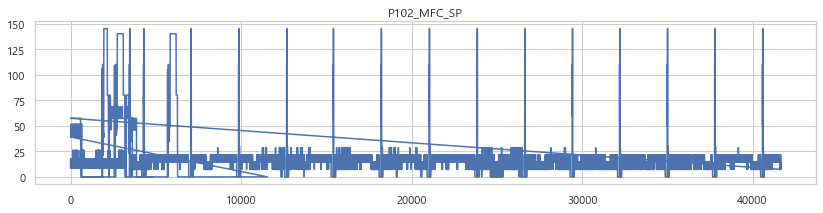

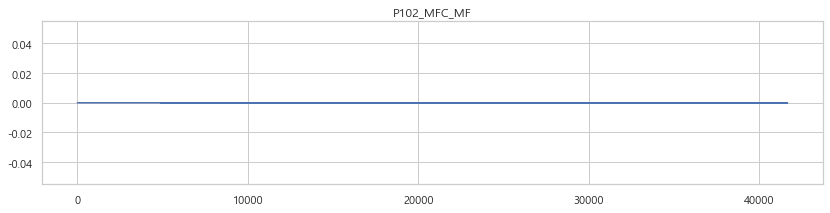

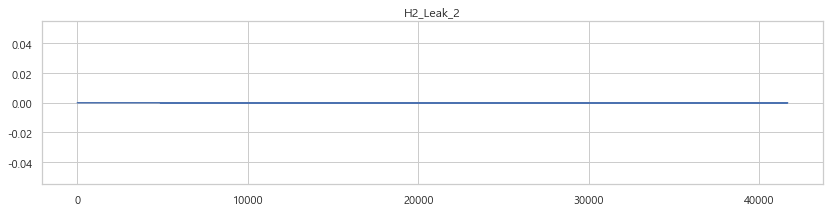

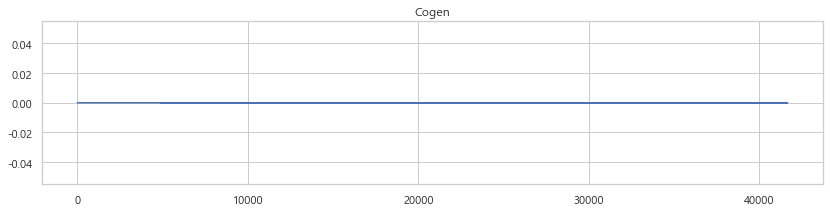

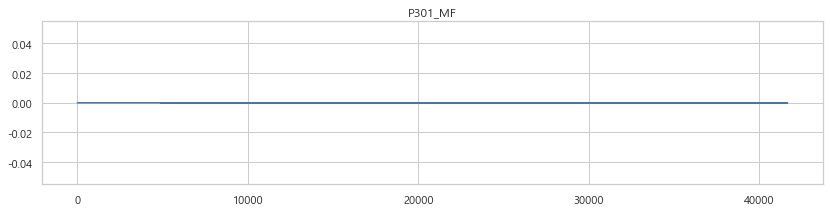

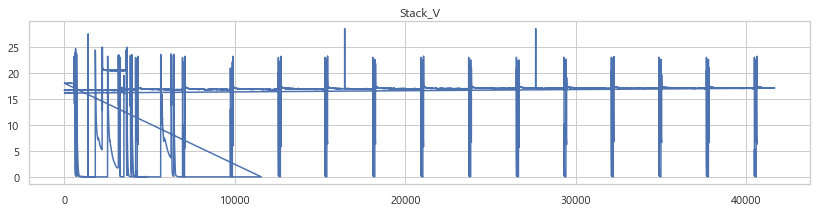

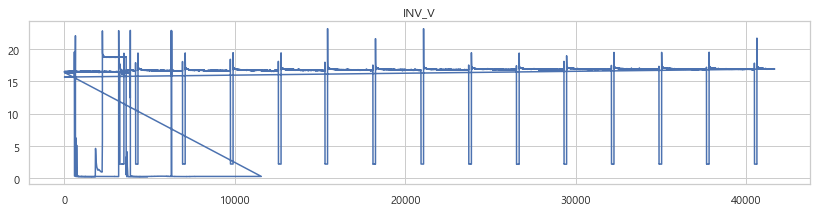

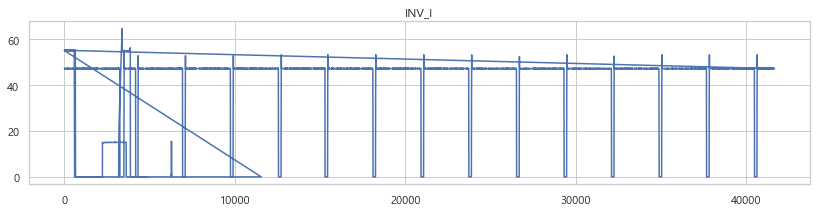

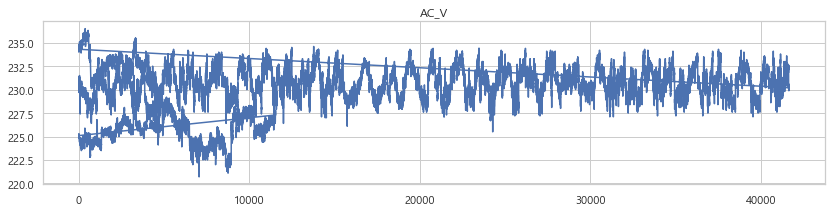

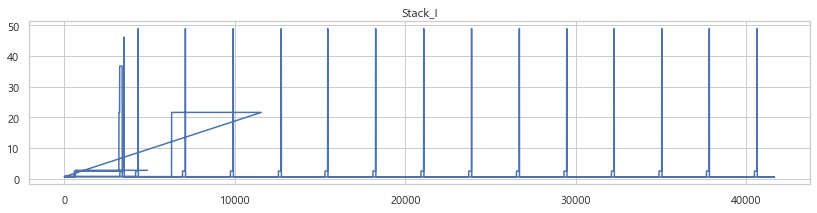

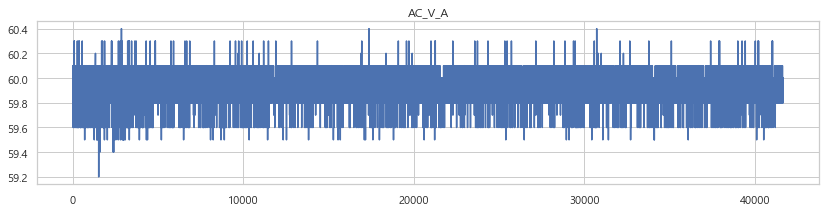

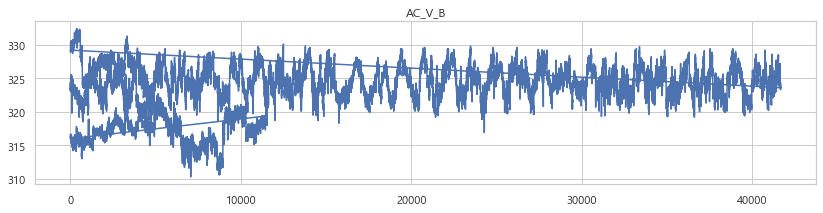

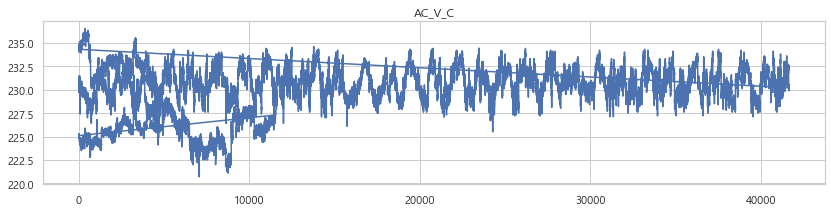

In [21]:
## 그래프 한꺼번에 그리기 - matplotlib 

for i in var_list_2 : 
    plt.figure(figsize = (14,3))   ## 차트의 사이즈 지정 (옵션)
    plt.title('%s' %i)             ## 차트의 타이틀 지정 (옵션)
    df[i].plot()
    plt.savefig('img/%s.png' %i)   ## 차트를 이미지파일로 저장 (옵션)

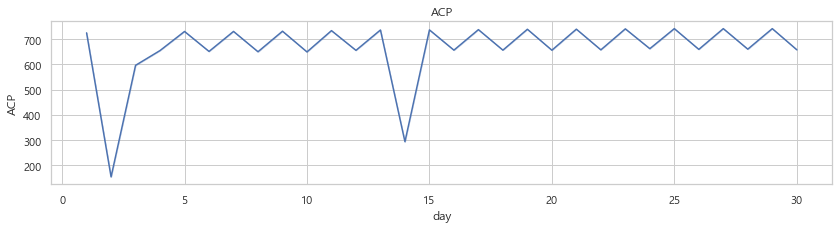

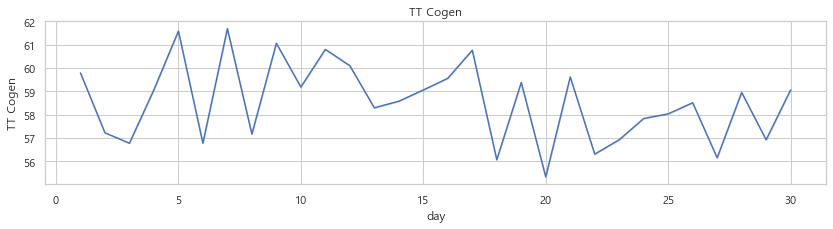

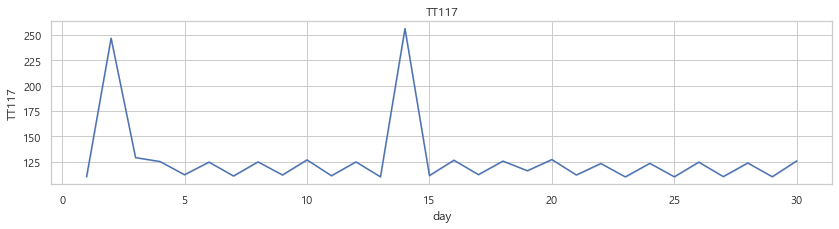

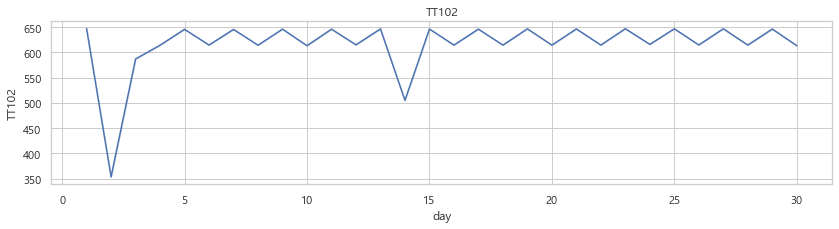

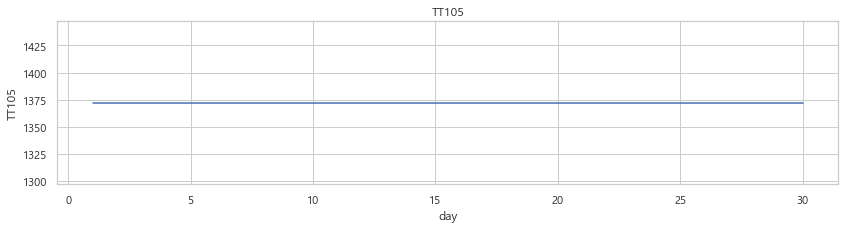

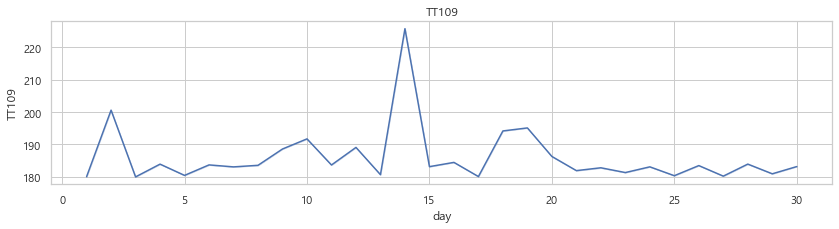

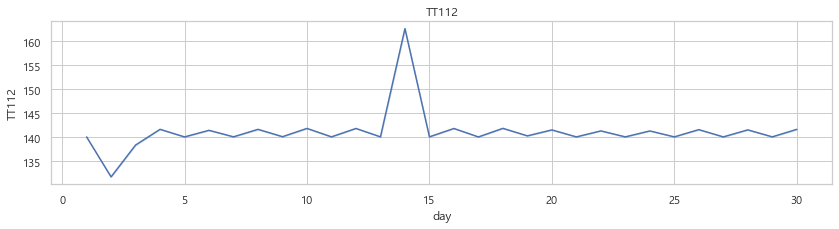

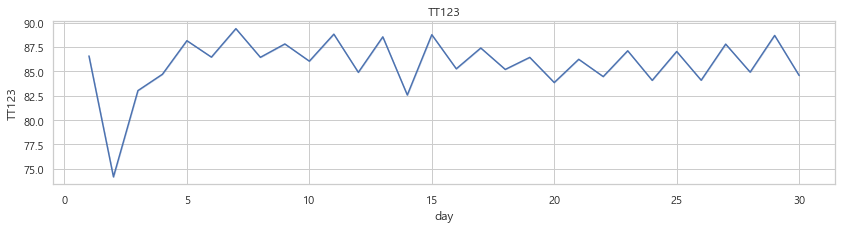

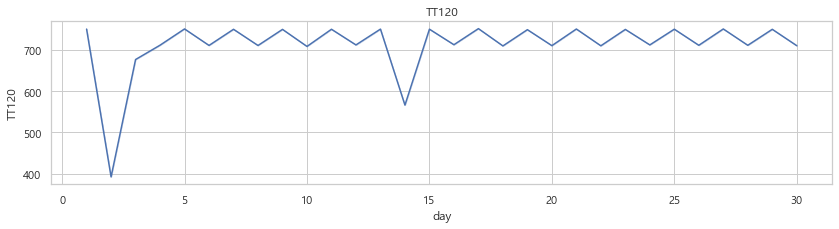

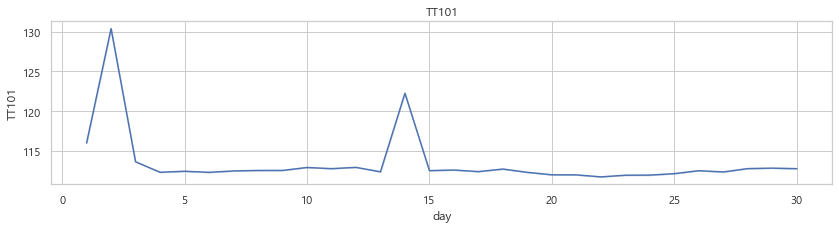

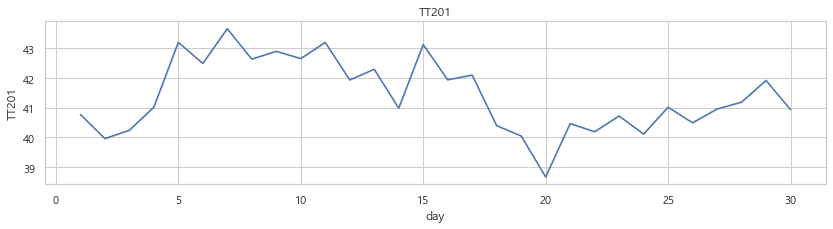

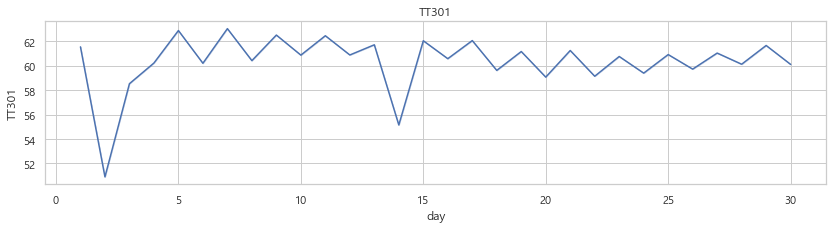

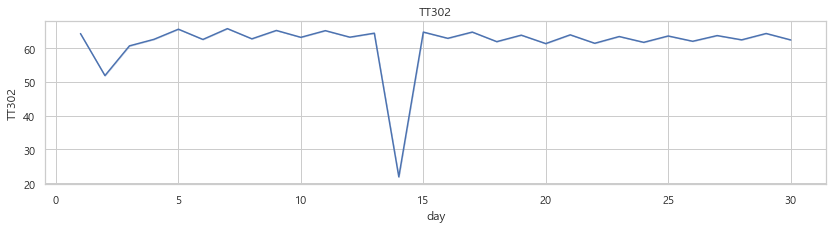

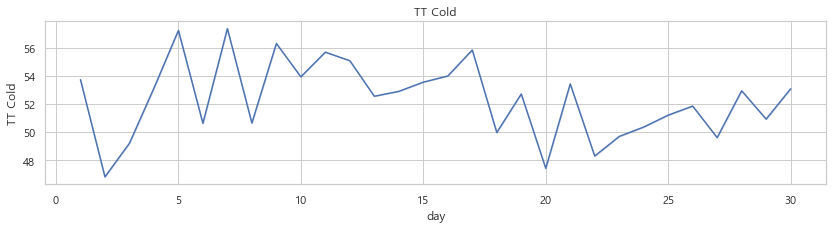

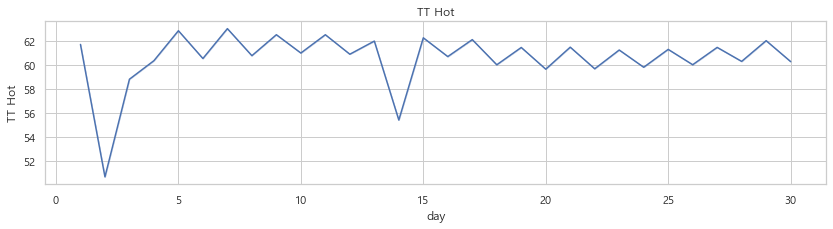

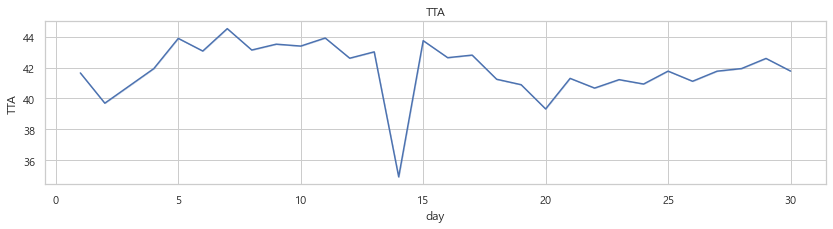

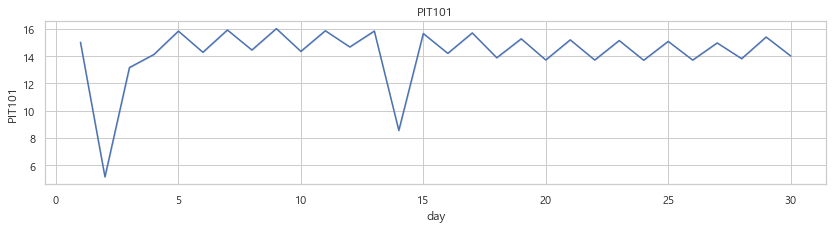

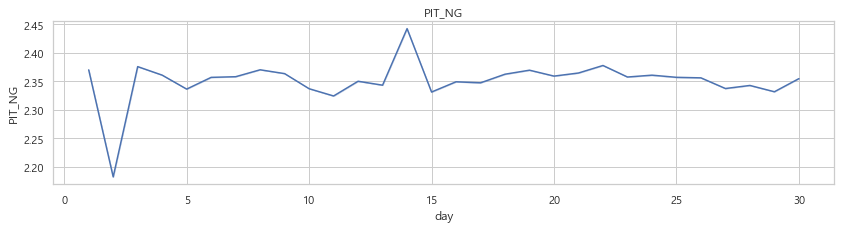

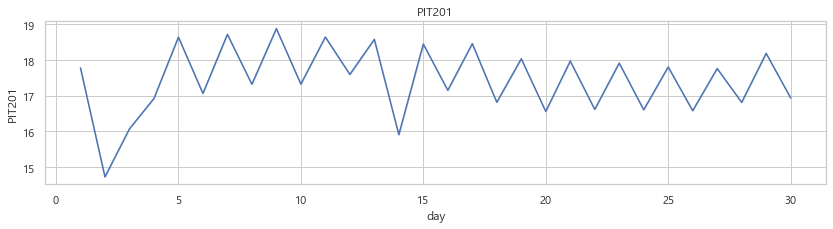

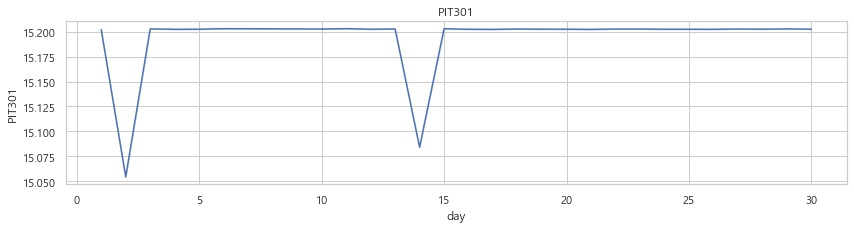

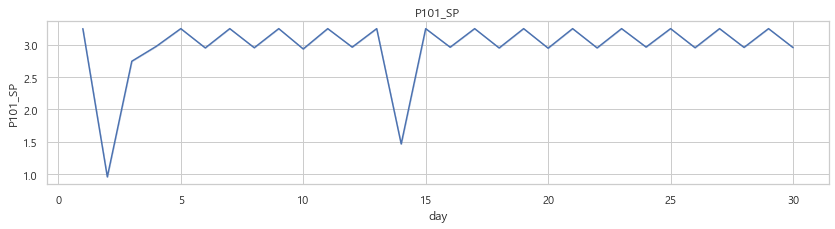

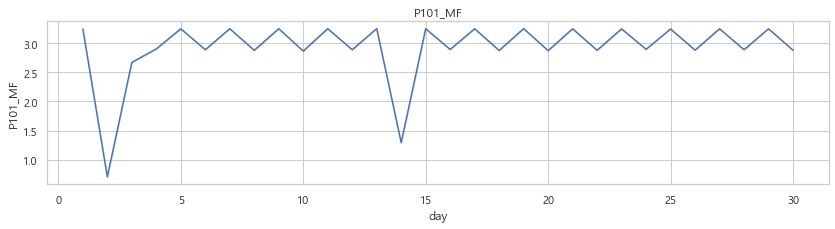

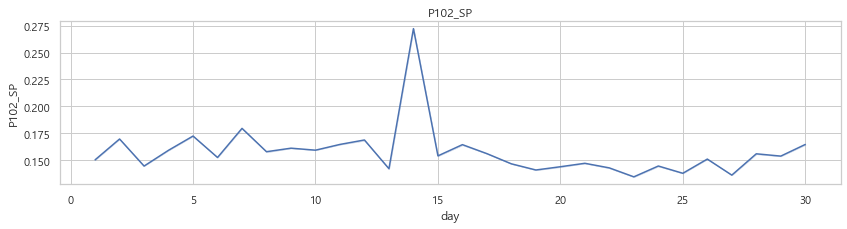

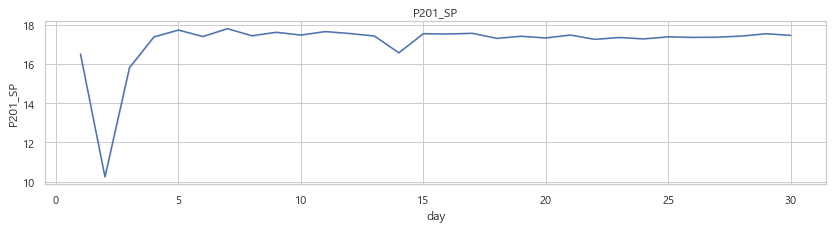

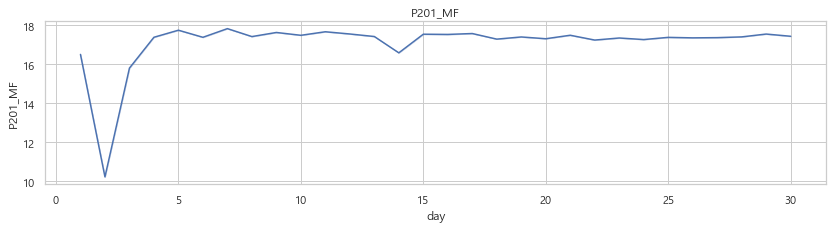

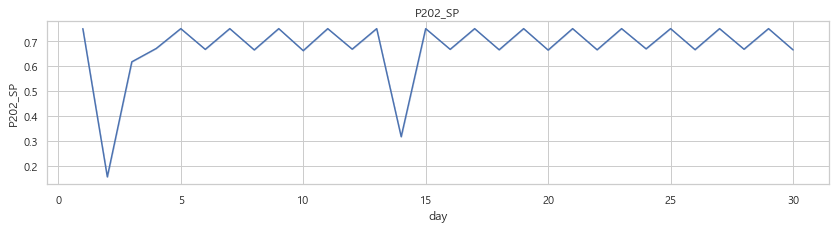

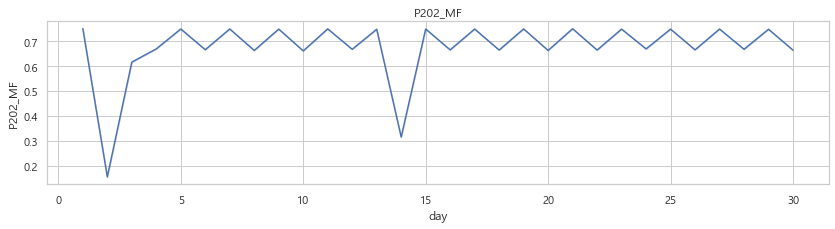

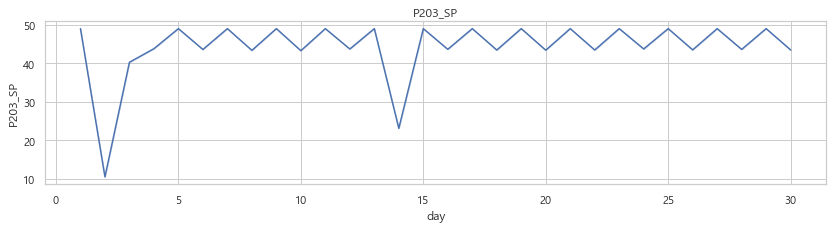

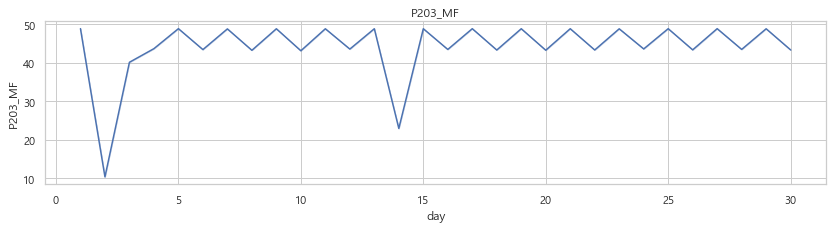

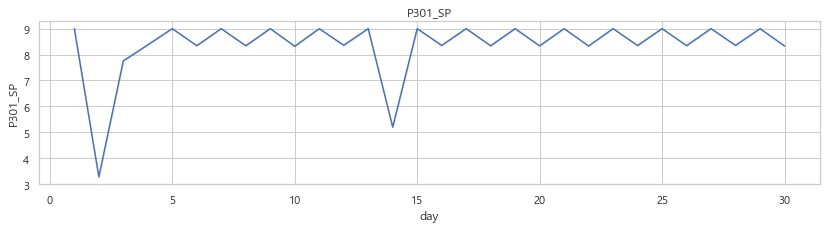

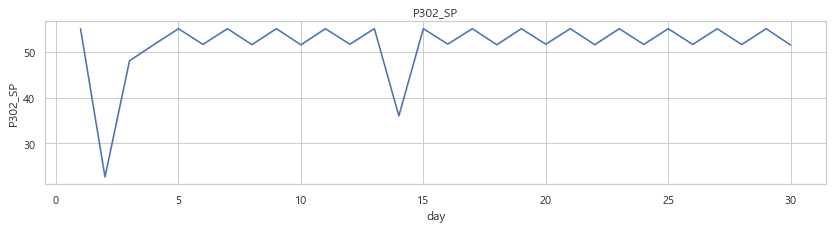

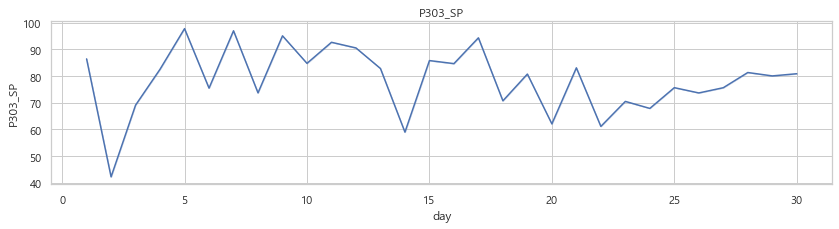

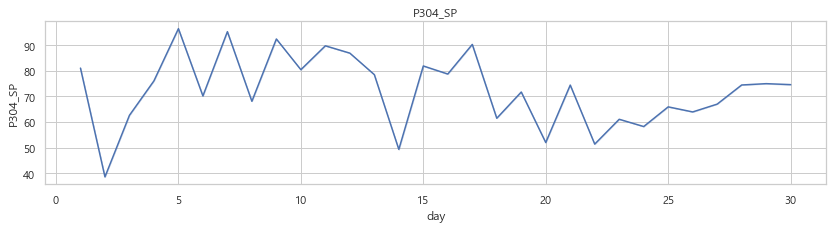

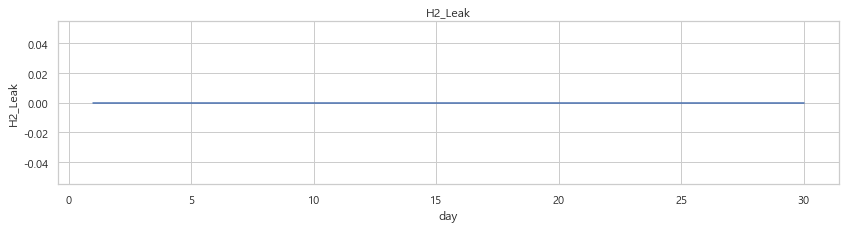

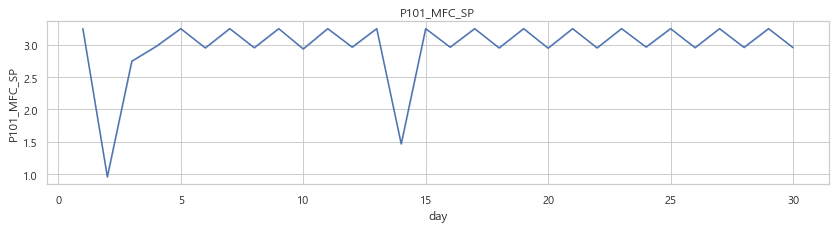

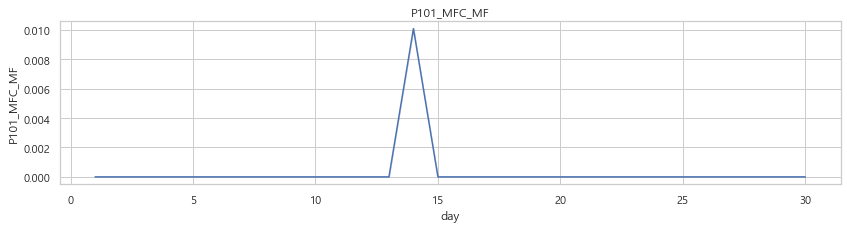

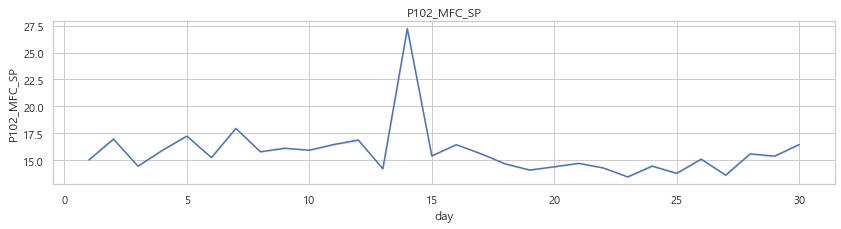

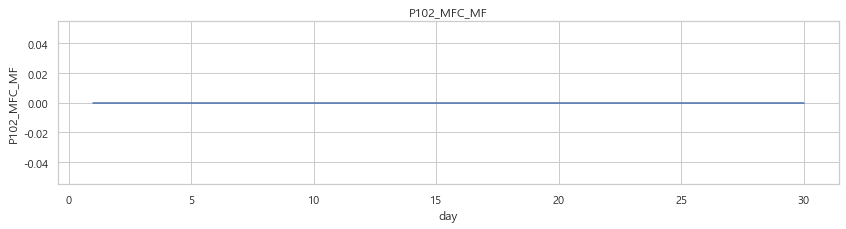

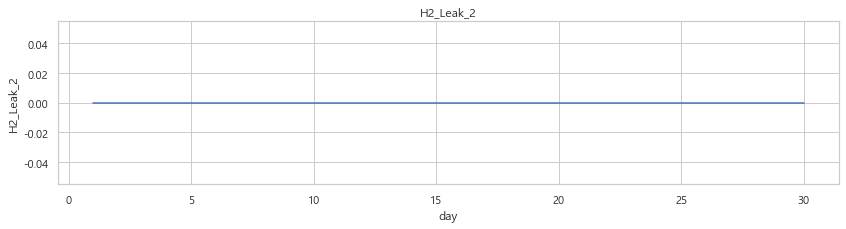

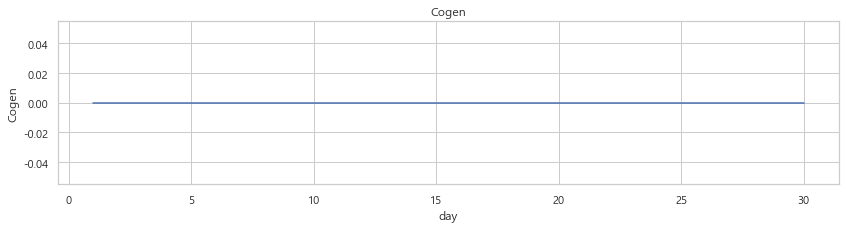

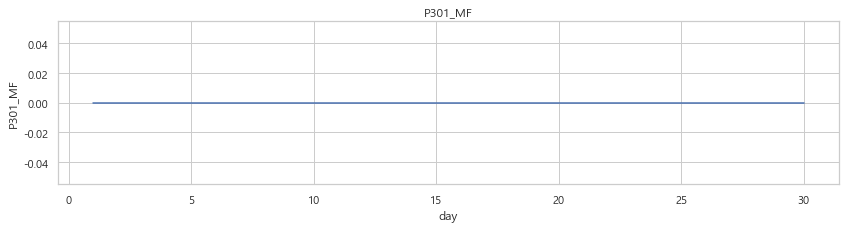

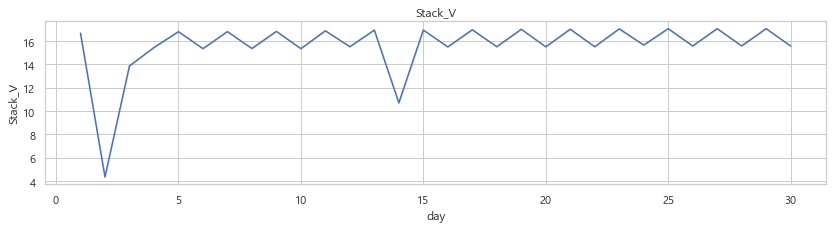

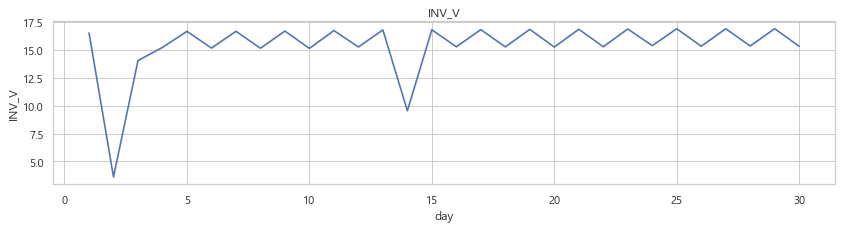

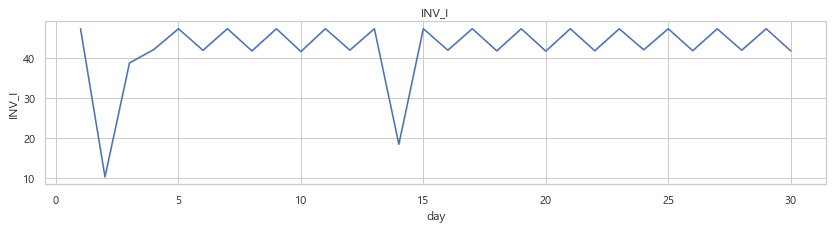

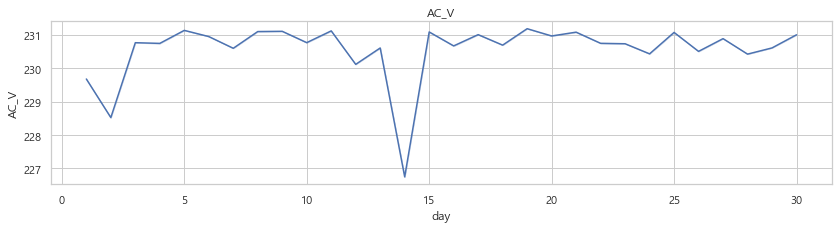

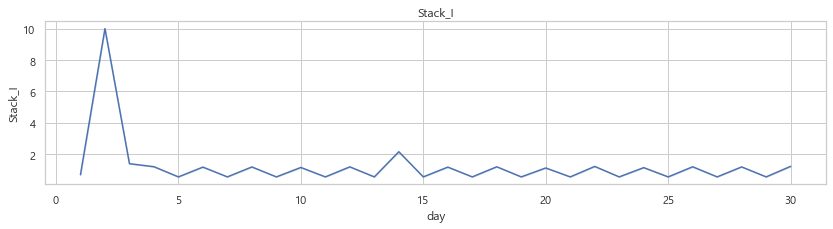

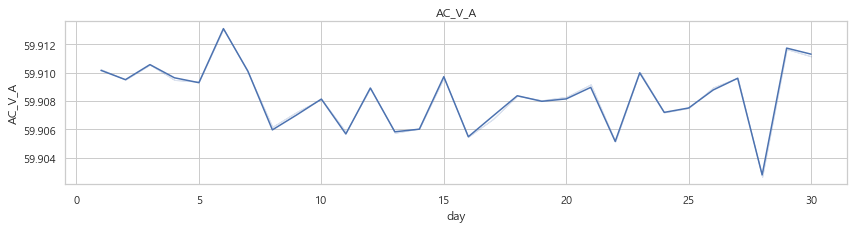

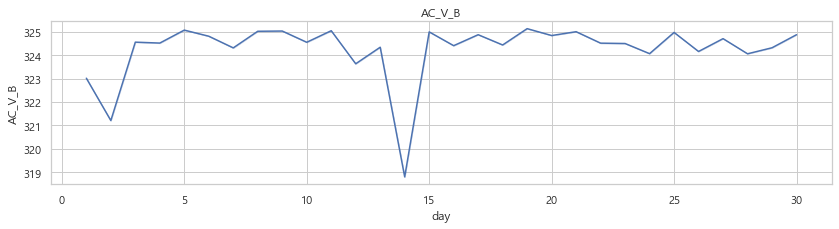

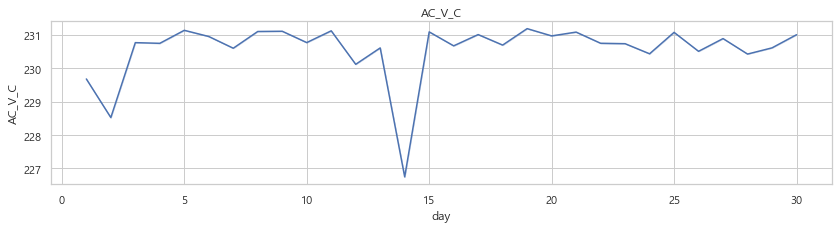

In [22]:
## 그래프 한꺼번에 그리기 - seaborn

for i in var_list_2 : 
    plt.figure(figsize = (14,3))   ## 차트의 사이즈 지정 (옵션)
    plt.title('%s' %i)             ## 차트의 타이틀 지정 (옵션)
    sns.lineplot(data = df, x = 'day', y= i, ci = 0)
    plt.savefig('img/%s.png' %i)   ## 차트를 이미지파일로 저장 (옵션)

In [26]:
## 특정조건을 필터링 하여 통계량 계산 및 그래프 그리기 

df_seq = df[df['Seq']== 4990]  ## Seq가 4990인 데이터만 추출하여 별도의 데이터셋을 만들어 준다. 

df_seq[['ACP', 'TT102', 'TT120']].describe() ## 새로 생성된 데이터로 부터, 필요한 변수들의 통계량 계산 

,ACP,TT102,TT120
count,40676.000000,40676.000000,40676.000000
mean,741.275715,646.739458,751.865995
std,19.997935,2.261005,9.390306
min,0.000000,638.600000,730.100000
25%,734.000000,645.700000,748.300000
50%,739.000000,646.400000,751.200000
75%,742.000000,647.400000,753.500000
max,856.000000,670.800000,817.700000


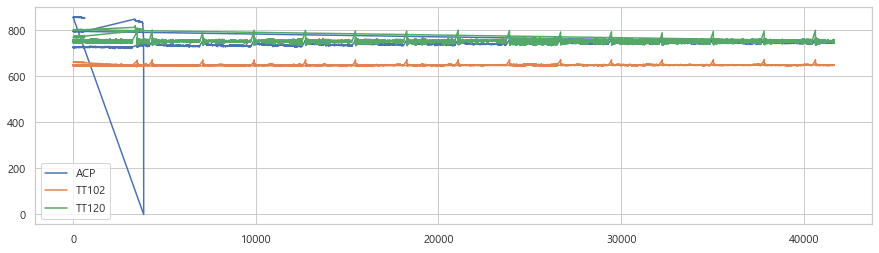

In [30]:
df_seq[['ACP', 'TT102', 'TT120']].plot() ## 새로 생성된 데이터로 부터, 필요한 변수들의 그래프 그리기
plt.legend()

<AxesSubplot:xlabel='TT102', ylabel='TT120'>

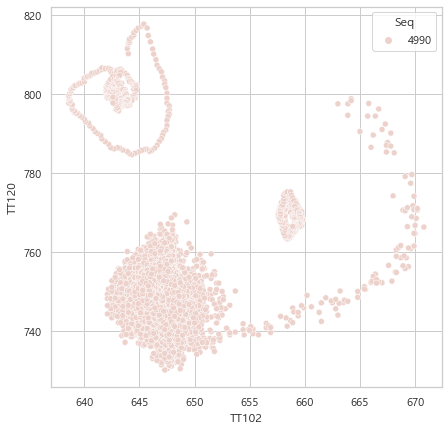

In [38]:
## 새로 생성된 데이터로 부터, 필요한 변수들에 대한 그래프 만들기 
plt.figure(figsize=(7,7))
sns.scatterplot(data=df_seq, x='TT102', y='TT120', hue='Seq')

#### 참고 
- 본 html 파일은 주피터 노트북의 메뉴 > Flie > Export Notebook as > HTML을 선택하여, exporting 되었다. 